<a href="https://colab.research.google.com/github/umehabiba123/Ecommerce-backend-task/blob/main/Copy_of_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.optimizers import Adam


In [5]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)

(50000, 32, 32, 3)


In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

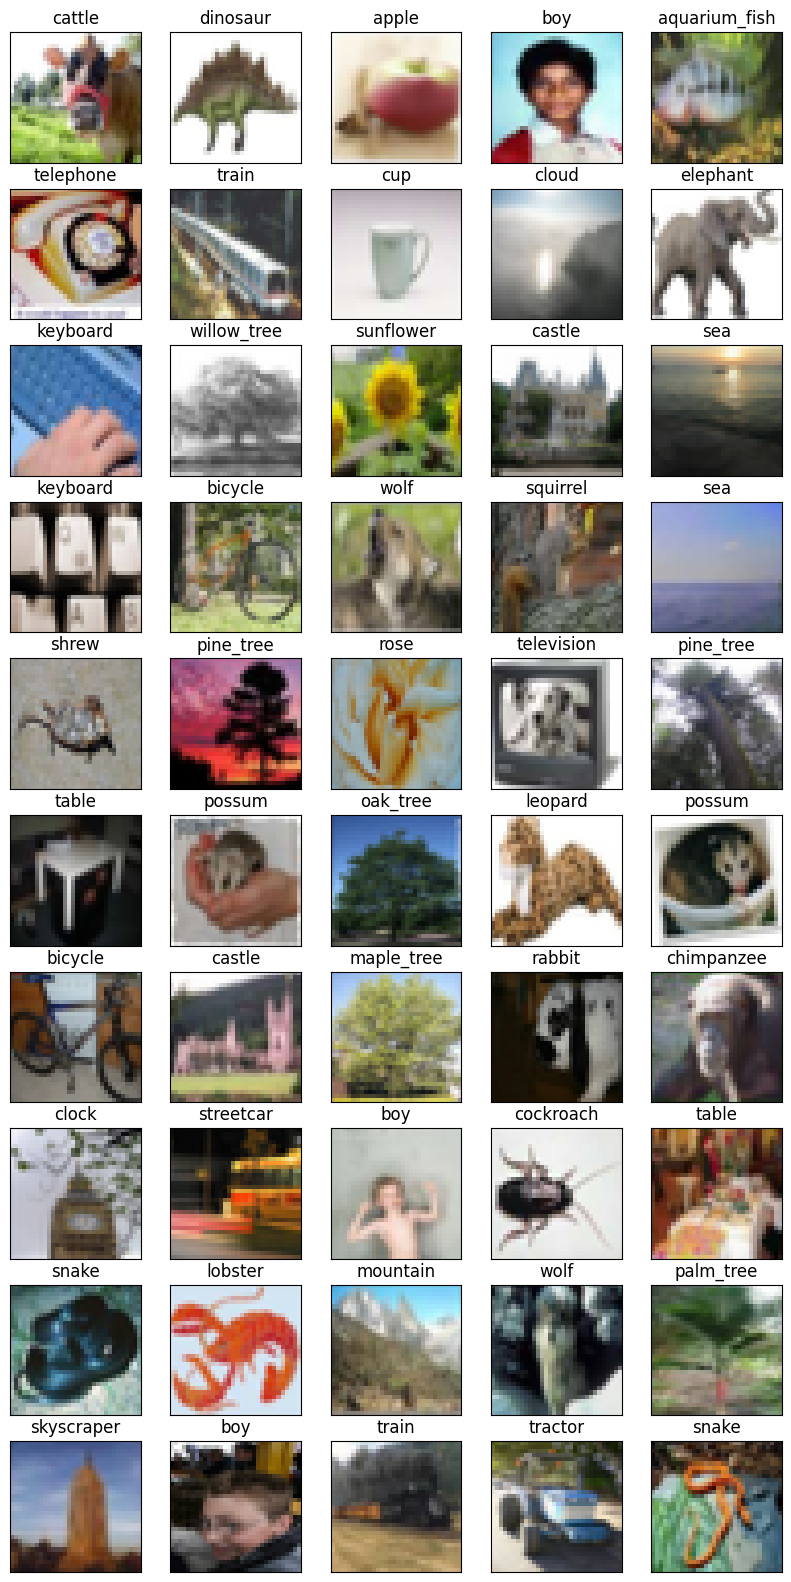

In [7]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
plt.figure(figsize=(10,20))
for i in range(50):
  ax = plt.subplot(10,5,i+1)
  ax.imshow(x_train[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  index= y_train[i][0]
  plt.title(class_names[index])



In [8]:
x_train = x_train.astype("float32") /255
x_test = x_test.astype("float32") /255

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


## **Define CNN Architecture**

In [16]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = "relu", input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
# MaxPooling2D layer with pool size 2x2
# Output size: 6x6x64
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Normalization
model.add(BatchNormalization())
# Flatten layer
# Output size: 1024
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Normaization
model.add(BatchNormalization())
# Dense layer with 10 units (output layer)
# Input size: 64, Output size: 10

model.add(Dense(100, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,196 (1.91 MB)

 Trainable params: 499,300 (1.90 MB)

 Non-trainable params: 896 (3.50 KB)

In [18]:
model.compile(optimizer="Adam", loss="categorical_crossentropy",metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=64, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 319ms/step - accuracy: 0.1444 - loss: 3.7764 - val_accuracy: 0.2686 - val_loss: 3.0147
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 241s 309ms/step - accuracy: 0.3378 - loss: 2.6333 - val_accuracy: 0.2691 - val_loss: 3.0696
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 237s 303ms/step - accuracy: 0.4222 - loss: 2.2351 - val_accuracy: 0.2629 - val_loss: 3.2801
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 302ms/step - accuracy: 0.4980 - loss: 1.9001 - val_accuracy: 0.3728 - val_loss: 2.6114
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 260s 300ms/step - accuracy: 0.5507 - loss: 1.6546 - val_accuracy: 0.4060 - val_loss: 2.4394


In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4098 - loss: 2.4236
Test accuracy: 0.4059999883174896


In [21]:
loss, accuracy = model.evaluate(x_train, y_train)
print('Test accuracy:', accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5845 - loss: 1.5091
Test accuracy: 0.5872600078582764


In [22]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step


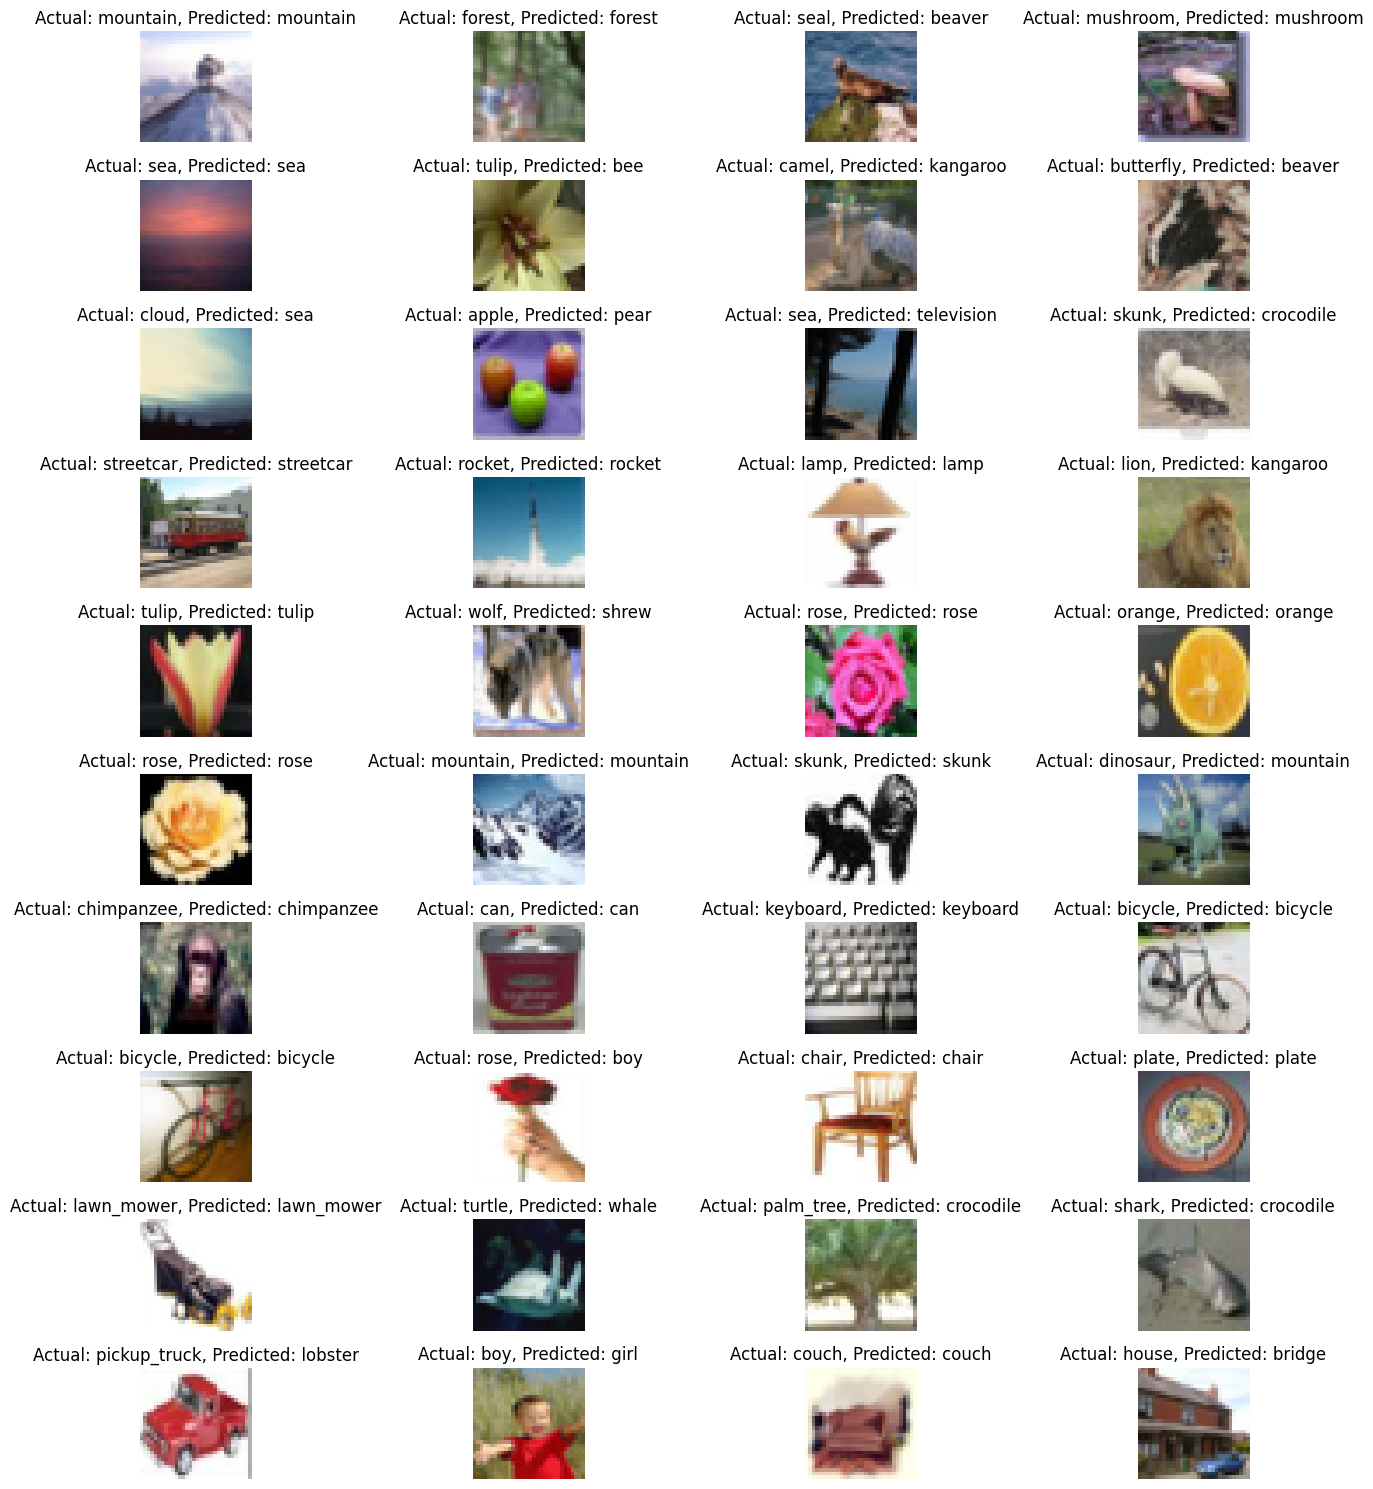

In [26]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
num_images_to_display = 40
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        # Use class_names instead of class_labels
        actual_label = class_names[np.argmax(y_test[i])]
        predicted_label = class_names[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()